<a href="https://colab.research.google.com/github/kevintsi/deep_learning_course/blob/main/deep_learning_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning course

In [12]:
## Install fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

## Deep learning image recognication

In [13]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

path

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.176491,0.021413,0.006766,02:00


epoch,train_loss,valid_loss,error_rate,time
0,0.054472,0.026056,0.007442,02:49


In [9]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [14]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Deep Learning is not just for Image Classification

In [16]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.303301,2.473298,00:05


epoch,train_loss,valid_loss,time
0,1.937296,1.585251,00:05
1,1.633847,1.490531,00:05
2,1.461440,1.322870,00:05
3,1.303473,0.986620,00:05
4,1.161602,0.844372,00:05
5,1.044123,0.784674,00:05
6,0.950486,0.761906,00:05
7,0.879459,0.756524,00:05


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


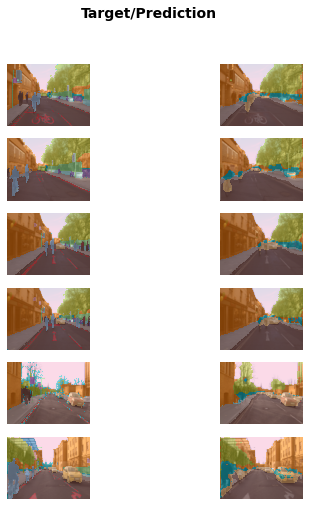

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.515840,0.421633,0.812720,29:01


epoch,train_loss,valid_loss,accuracy,time
0,0.327154,0.250645,0.902320,49:37
1,0.254696,0.229775,0.900400,49:35
